<a href="https://colab.research.google.com/github/VrishankDesai/ISRO/blob/main/Raster_Data_Format.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import os
from osgeo import osr
import math
import mpl_toolkits.axes_grid1
from IPython.display import HTML,display
from pprint import pprint
!pip install --upgrade matplotlib ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 600.2/600.2 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.7.1
    Uninstalling traitlets-5.7.1:
      Successfully uninstalled traitlets-5.7.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0

In [ ]:
file_name=gdal.Open(r'/content/acbYq.png')

In [ ]:
raster_info=gdal.Info(file_name,format='json')

In [ ]:
print(raster_info)

{'description': '/content/acbYq.png', 'driverShortName': 'PNG', 'driverLongName': 'Portable Network Graphics', 'files': ['/content/acbYq.png'], 'size': [853, 395], 'metadata': {'IMAGE_STRUCTURE': {'INTERLEAVE': 'PIXEL'}}, 'cornerCoordinates': {'upperLeft': [0.0, 0.0], 'lowerLeft': [0.0, 395.0], 'lowerRight': [853.0, 395.0], 'upperRight': [853.0, 0.0], 'center': [426.5, 197.5]}, 'extent': {'type': 'Polygon', 'coordinates': [[]]}, 'bands': [{'band': 1, 'block': [853, 1], 'type': 'Byte', 'colorInterpretation': 'Red', 'mask': {'flags': ['PER_DATASET', 'ALPHA'], 'overviews': []}, 'metadata': {}}, {'band': 2, 'block': [853, 1], 'type': 'Byte', 'colorInterpretation': 'Green', 'mask': {'flags': ['PER_DATASET', 'ALPHA'], 'overviews': []}, 'metadata': {}}, {'band': 3, 'block': [853, 1], 'type': 'Byte', 'colorInterpretation': 'Blue', 'mask': {'flags': ['PER_DATASET', 'ALPHA'], 'overviews': []}, 'metadata': {}}, {'band': 4, 'block': [853, 1], 'type': 'Byte', 'colorInterpretation': 'Alpha', 'metada

In [ ]:
ds=gdal.Open(r'/content/acbYq.png')
ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7b585a9a1020> >

In [ ]:
print('File list:', ds.GetFileList())

File list: ['/content/acbYq.png']


In [ ]:
print('Width:',ds.RasterXSize)
print('Height:',ds.RasterYSize)

Width: 853
Height: 395


In [ ]:
print('Coordinate system:',ds.GetProjection())

Coordinate system: 


In [ ]:
gt=ds.GetGeoTransform()
gt

(0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

In [ ]:
print('Origin:',(gt[0],gt[3]))
print('Pixel size:',(gt[1],gt[5]))

Origin: (0.0, 0.0)
Pixel size: (1.0, 1.0)


In [ ]:
print('Upper left corner:',gdal.ApplyGeoTransform(gt,0,0))
print('Lower right corner:',gdal.ApplyGeoTransform(gt,ds.RasterXSize,ds.RasterYSize))
print('Upper right corner:',gdal.ApplyGeoTransform(gt,ds.RasterXSize,0))
print('Lower left corner:',gdal.ApplyGeoTransform(gt,0,ds.RasterYSize))
print('Center:',gdal.ApplyGeoTransform(gt,ds.RasterXSize/2,ds.RasterYSize/2))

Upper left corner: [0.0, 0.0]
Lower right corner: [853.0, 395.0]
Upper right corner: [853.0, 0.0]
Lower left corner: [0.0, 395.0]
Center: [426.5, 197.5]


In [ ]:
print('Metadata:',ds.GetMetadata())

Metadata: {}


In [ ]:
print('No of bands:',ds.RasterCount)

No of bands: 4


In [ ]:
for i in range(1,ds.RasterCount+1):
  band=ds.GetRasterBand(1)
  interp=band.GetColorInterpretation()
  interp_name=gdal.GetColorInterpretationName(interp)
  (w,h)=band.GetBlockSize()
  print('Band {0:d}, block size {1:d} {2:d}, color interp {3:s}'.format(i,w,h,interp_name))
  ovr_count=band.GetOverviewCount()
  for j in range(ovr_count):
    ovr_band=band.GetOverview(j)
    print('Overview %d: %dx%d'%(j,ovr_band.XSize,ovr_band.YSize))

Band 1, block size 853 1, color interp Red
Band 2, block size 853 1, color interp Red
Band 3, block size 853 1, color interp Red
Band 4, block size 853 1, color interp Red


In [ ]:
del ds

In [ ]:
ds=gdal.Open(r'/content/acbYq.png')
ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7b585a9a04b0> >

In [ ]:
for i in range(1,ds.RasterCount+1):
  band=ds.GetRasterBand(i)
  (minimum,maximum,mean,stddev)=band.ComputeStatistics(False)
  print('Band {0:d}: min={1:f} max={2:f} mean={3:f} stddev={4:f}'.format(i,minimum,maximum,mean,stddev))

Band 1: min=2.000000 max=255.000000 mean=126.685117 stddev=87.006954
Band 2: min=0.000000 max=255.000000 mean=109.404556 stddev=101.647258
Band 3: min=2.000000 max=255.000000 mean=158.465345 stddev=67.521418
Band 4: min=255.000000 max=255.000000 mean=255.000000 stddev=0.000000


In [ ]:
band=ds.GetRasterBand(1)

In [ ]:
data=band.ReadAsArray()

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
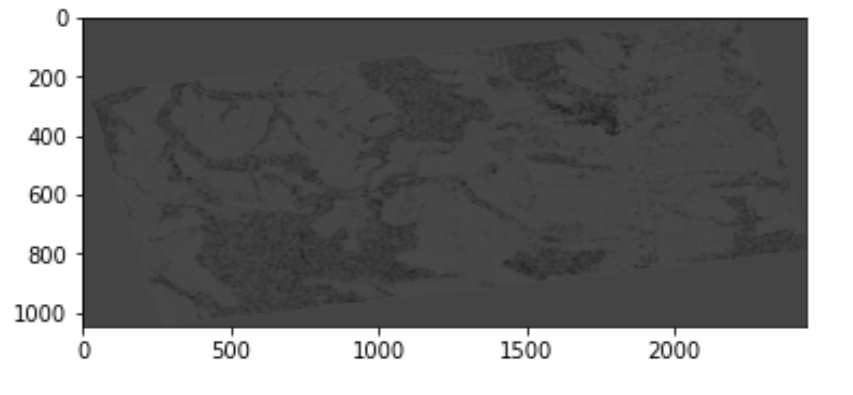

In [ ]:
data

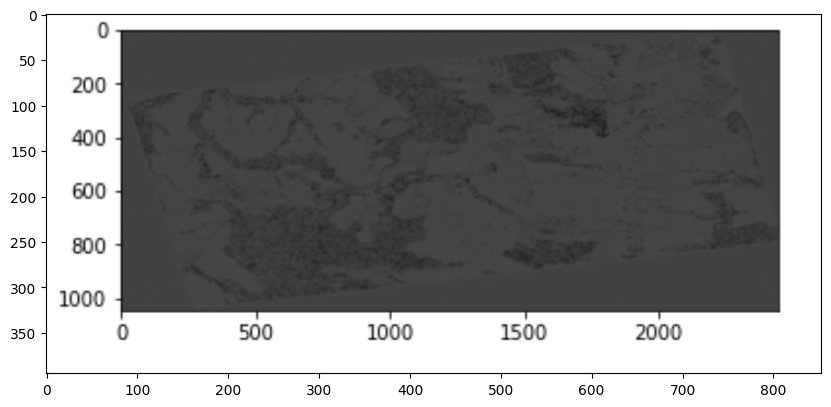

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(data,cmap='gray')


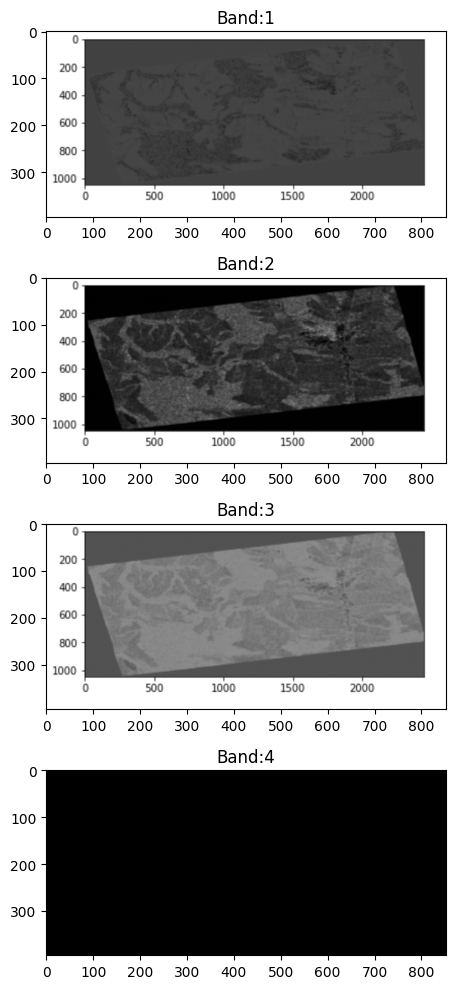

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(ds.RasterCount):
    band = ds.GetRasterBand(i + 1)
    plt.subplot(ds.RasterCount, 1, i + 1)
    plt.title('Band:' + str(i + 1))
    plt.imshow(band.ReadAsArray(), cmap='gray')
    plt.tight_layout()

In [ ]:
#Visualizing multi band raster
#false colour composite
multi_data=ds.ReadAsArray(band_list=[3,2,1])

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
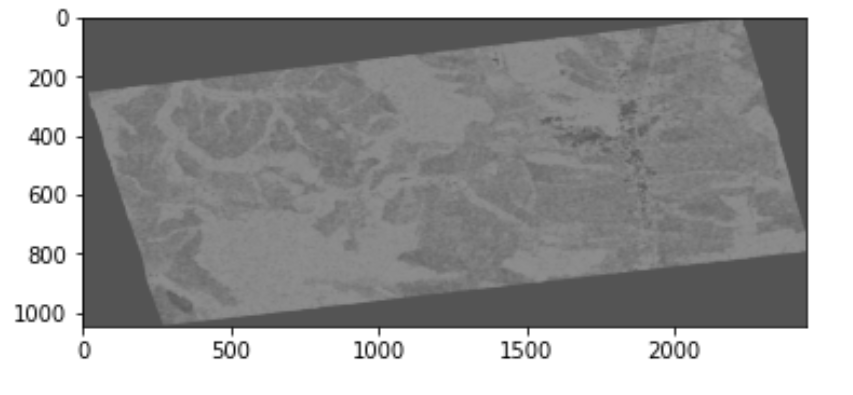

In [ ]:
multi_data[0]


In [ ]:
multi_data.shape

(3, 395, 853)

In [ ]:
multi_data=np.transpose(multi_data,axes=(1,2,0))

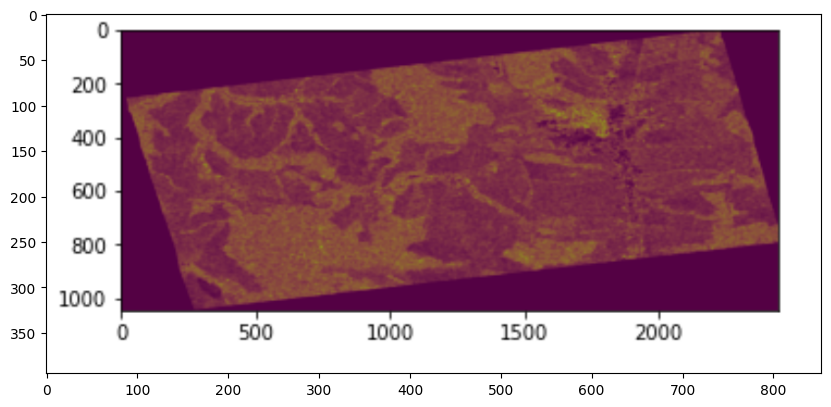

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(multi_data)

In [ ]:
plt.close()

In [ ]:
multi_data=ds.ReadAsArray(band_list=[2,3,1])

In [ ]:
multi_data=np.transpose(multi_data,axes=(1,2,0))

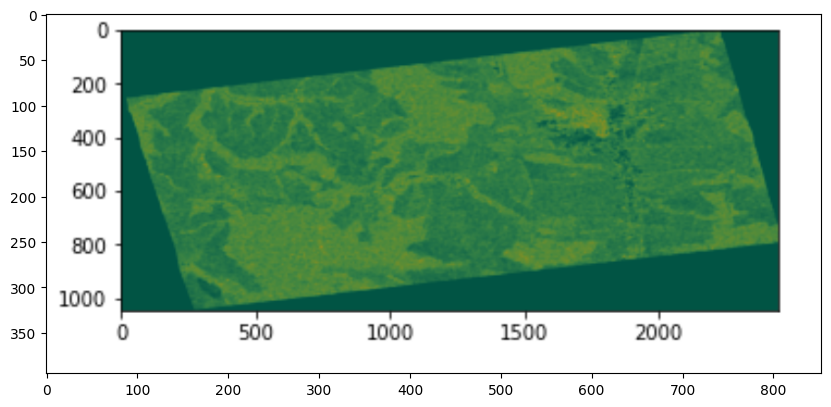

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(multi_data)

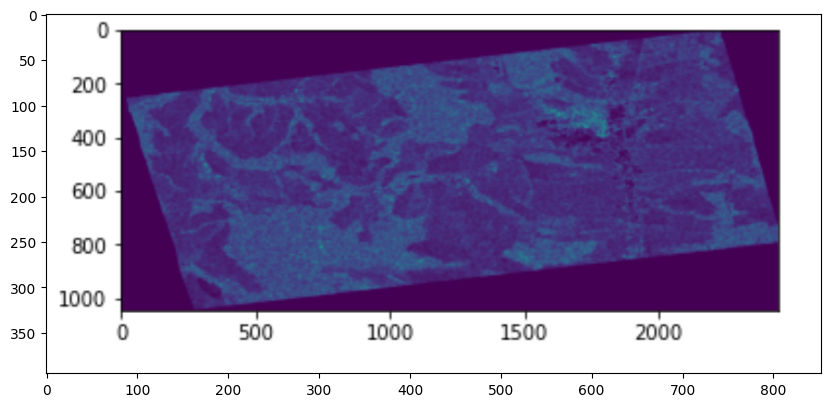

In [ ]:
multi_data=ds.ReadAsArray(band_list=[1,2,3])
multi_data=np.transpose(multi_data,axes=(1,2,0))
plt.figure(figsize=(10,10))
plt.imshow(multi_data)

In [ ]:
#reading partial data set
band=ds.GetRasterBand(1)

In [ ]:
data=band.ReadAsArray(xoff=0,yoff=0,win_xsize=100,win_ysize=100)

In [ ]:
data.shape

(100, 100)

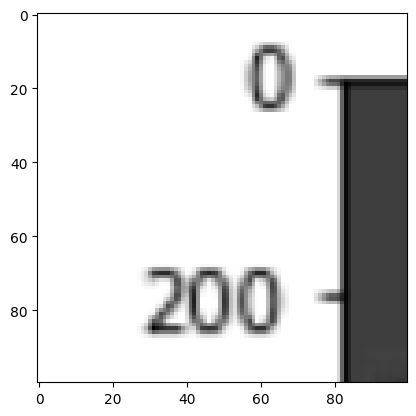

In [ ]:
plt.imshow(data,cmap='gray')